# **Koneksi Ke Google Big Query**

In [1]:
# Import library
from google.colab import auth
from google.colab import data_table
from google.cloud import bigquery
from pandas_gbq import to_gbq
import pandas as pd
import numpy as np

# Proses autentikasi akun, yang menandakan sudah terkonesksi dengan google cloud
auth.authenticate_user()
print('Authenticated')

Authenticated


In [2]:
from google.cloud import bigquery

# Buat BigQuery client
project_id = 'dqlab-x-komdigi'
bq_client = bigquery.Client(project = project_id)

# **Proses Ekstraksi Data dari sumber (Extract)**

### **Proses Ekstraksi Data Transaksi**

In [3]:
# Extract Data Transaksi menggunakan query
%%bigquery data_transaksi --project {project_id}

-- Tulis Query disini
SELECT * FROM dqlab-468906.dqcommerce.tbl_transaction

Query is running:   0%|          |

Downloading:   0%|          |

### **Proses Ekstraksi Data Product**

In [5]:
# Extract Data Product menggunakan query
%%bigquery data_product --project {project_id}

-- Tulis Query disini
SELECT * FROM dqlab-468906.dqcommerce.tbl_product

Query is running:   0%|          |

Downloading:   0%|          |

### **Proses Ekstraksi Data Funnel**

In [6]:
# Extract Data Funnel menggunakan query
%%bigquery data_funnel --project {project_id}

-- Tulis Query disini
SELECT * FROM dqlab-468906.dqcommerce.tbl_funnel

Query is running:   0%|          |

Downloading:   0%|          |

Setelah query dijalankan maka akan disimpan sebagai dataframe pandas

## **Periksa Informasi Umum pada Data**

In [7]:
# Periksa info umum pada tabel data menggunakan pandas
data_transaksi.info()

# Pada kolom trx_id dan units terdapat missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829262 entries, 0 to 829261
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   trx_id      829257 non-null  object
 1   product_id  829262 non-null  object
 2   trx_date    829262 non-null  Int64 
 3   trx_time    829262 non-null  dbtime
 4   units       829251 non-null  Int64 
dtypes: Int64(2), dbtime(1), object(2)
memory usage: 33.2+ MB


In [8]:
# Periksa info umum pada tabel data menggunakan pandas
data_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_id        37 non-null     object
 1   product_name      37 non-null     object
 2   product_category  37 non-null     object
 3   product_cost      37 non-null     object
 4   product_price     37 non-null     object
dtypes: object(5)
memory usage: 1.6+ KB


In [9]:
# Periksa info umum pada tabel data menggunakan pandas
data_funnel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15950 entries, 0 to 15949
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         15950 non-null  Int64 
 1   product_id   15950 non-null  object
 2   purchase     15950 non-null  Int64 
 3   add_to_cart  15950 non-null  Int64 
 4   click        15950 non-null  Int64 
 5   view         15950 non-null  Int64 
dtypes: Int64(5), object(1)
memory usage: 825.7+ KB


# **Proses Transformasi Data (Transform)**

Sebelum melakukan tranformasi, amati data terlebih dahulu dengan "sample"

In [11]:
data_transaksi.sample(15)

,trx_id,product_id,trx_date,trx_time,units
782796,DQTrx487190,DQProduk-018,17022025,04:28:53,3
617061,DQTrx428359,DQProduk-030,6012025,16:05:41,1
763076,DQTrx438522,DQProduk-006,13012025,10:09:51,3
722923,DQTrx417354,DQProduk-019,30122024,06:47:36,2
520842,DQTrx826701,DQProduk-024,29092025,09:28:27,1
68162,DQTrx750776,DQProduk-002,3082025,07:31:18,1
168471,DQTrx787564,DQProduk-006,1092025,23:29:04,1
378535,DQTrx053713,DQProduk-017,24022024,22:39:44,1
108927,DQTrx462528,DQProduk-004,31012025,05:16:44,1
494928,DQTrx537942,DQProduk-023,24032025,03:51:52,1


Dari data di atas, kolom trx_date memiliki data yang tidak seragam dimana terdapat angka yang memiliki 7 angka '1092025' ataupun 8 angka '24022024'

### **Transformasi Data Transaksi**

- Ubah kolom trx_date DDMMYYYY menjadi YYYY-MM-DD lalu konversi ke tipe data DATE
- Hapus data yang trx_id nya kosong
- Isikan 0 pada kolom units yang kosong
- Periksa duplikasi data, jika terdapat data yang duplikat hapus salah satunya


#### Konversi trx_date

In [12]:
# Konversi kolom trx_date dari Integer menjadi string
data_transaksi['trx_date'] = data_transaksi['trx_date'].astype('str')

# Buat kondisi
data_transaksi['trx_date'] = np.where(data_transaksi['trx_date'].str.len() == 7, '0' + data_transaksi['trx_date'], data_transaksi['trx_date'])

# Konversi ke date
data_transaksi['trx_date'] = pd.to_datetime(data_transaksi['trx_date'], format = '%d%m%Y')
data_transaksi.sample(10)

,trx_id,product_id,trx_date,trx_time,units
466585,DQTrx024834,DQProduk-020,2024-01-27,22:21:06,1
640375,DQTrx157872,DQProduk-031,2024-05-28,11:38:01,1
388671,DQTrx335798,DQProduk-017,2024-11-02,22:31:41,1
216714,DQTrx282238,DQProduk-008,2024-09-17,06:04:46,1
239087,DQTrx603561,DQProduk-008,2025-05-02,19:30:16,1
734643,DQTrx641615,DQProduk-025,2025-05-26,20:05:20,2
659407,DQTrx659154,DQProduk-031,2025-06-06,04:04:00,1
278615,DQTrx142567,DQProduk-010,2024-05-15,03:42:03,1
365284,DQTrx824427,DQProduk-015,2025-09-28,22:53:53,1
499603,DQTrx021186,DQProduk-024,2024-01-23,11:00:01,1


Diubah menjadi string supaya angka '0' di depan akan kebaca

# Periksa data yang kosong

In [29]:
# Periksa missing value pada kolom trx_id
data_transaksi[data_transaksi['trx_id'].isna()]

# Periksa missing value pada kolom units
data_transaksi[data_transaksi['units'].isna()]

,trx_id,product_id,trx_date,trx_time,units


Pada trx_id ada 5 yang kosong. Kemungkinan disebabkan dari sistem yang gagal men-generate kode transaksi. Dengan begitu, data dengan missing value seperti di atas termasuk tidak valid sehingga harus dihapus.

Pada Units ada banyak data yang kosong. Pada kolom units data yang kosong tidak akan dihapus, tetapi diisi dengan angka '0'

#### Hapus data dengan trx_id yang kosong

In [14]:
# Data asli (sebelum di drop) untuk cek ukuran
data_transaksi.shape

(829262, 5)

In [15]:
# Hapus data yang kosong
data_transaksi = data_transaksi[data_transaksi['trx_id'].notnull()]
data_transaksi.shape

(829257, 5)

#### Isikan 0 pada kolom units yang kosong

In [27]:
data_transaksi['units'] = data_transaksi['units'].fillna(0)

#### Periksa duplikasi data

In [28]:
data_transaksi.duplicated(subset = 'trx_id').sum()

np.int64(0)

#### Tampilkan hasil akhir hasil transformasi

In [ ]:
data_product.head()

,product_id,product_name,product_category,product_cost,product_price
0,DQProduk-009,Pulpen Metal DQLab,Alat Tulis,IDR 149850,IDR 164850
1,DQProduk-003,Sticky Notes DQLab,Alat Tulis,IDR 29850,IDR 59850
2,DQProduk-025,Tipe-X Roller DQLab,Alat Tulis,IDR 29850,IDR 44850
3,DQProduk-016,Set Pulpen DQLab,Alat Tulis,IDR 44850,IDR 149850
4,DQProduk-028,Penanda Warna DQLab,Alat Tulis,IDR 59850,IDR 164850


### **Transformasi Data Product**

- Ubah kolom product_cost dan product_price menjadi kolom angka dengan menghapus simbol mata uang
- Periksa duplikasi data, jika terdapat data yang duplikat hapus salah satunya


#### Transformasi kolom product_cost dan product_price

In [ ]:
for col in ['product_cost', 'product_price']:
    data_product[col] = data_product[col].str.replace('IDR ', '')
    data_product[col] = data_product[col].astype(pd.Int64Dtype())

#### Periksa duplikasi data

In [30]:
data_product.duplicated().sum()

np.int64(2)

In [31]:
data_product[data_product.duplicated(subset='product_id', keep = False)]

,product_id,product_name,product_category,product_cost,product_price
17,DQProduk-035,Kartu Ucapan DQLab,Kertas & Cetak,IDR 59850,IDR 119850
18,DQProduk-035,Kartu Ucapan DQLab,Kertas & Cetak,IDR 59850,IDR 119850
27,DQProduk-015,Mousepad Custom DQLab,Merchandise,IDR 59850,IDR 89850
28,DQProduk-015,Mousepad Custom DQLab,Merchandise,IDR 59850,IDR 89850


Ternyata terdapat 2 data yang sama

#### Hapus duplikasi data

In [32]:
data_product.shape

(37, 5)

In [33]:
data_product = data_product.drop_duplicates(subset = ['product_id'], keep = 'first')
data_product.shape

(35, 5)

### **Proses Integrasi Data Transaksi dan Data Product**

In [34]:
data_integration = data_transaksi.merge(data_product, on = 'product_id', how = 'left')
data_integration.head()

,trx_id,product_id,trx_date,trx_time,units,product_name,product_category,product_cost,product_price
0,DQTrx829214,DQProduk-016,2025-09-30,01:18:05,0,Set Pulpen DQLab,Alat Tulis,IDR 44850,IDR 149850
1,DQTrx829166,DQProduk-017,2025-09-30,18:58:33,0,Set Tulis Eksekutif DQLab,Merchandise,IDR 209850,IDR 299850
2,DQTrx829118,DQProduk-018,2025-09-30,06:58:09,0,Printer Mini DQLab,Elektronik,IDR 524850,IDR 599850
3,DQTrx829186,DQProduk-019,2025-09-30,09:28:13,0,Kertas Warna DQLab,Kertas & Cetak,IDR 209850,IDR 239850
4,DQTrx829212,DQProduk-019,2025-09-30,15:00:55,0,Kertas Warna DQLab,Kertas & Cetak,IDR 209850,IDR 239850


# **Proses Simpan Data (Load)**

In [36]:
import pandas as pd

# Upload ke BigQuery - tabel belum ada
to_gbq(
    data_integration,
    destination_table = 'data_warehouse_dqcommerce.tbl_integration',
    project_id = project_id,
    if_exists = 'fail'
)

TableCreationError: Reason: Already Exists: Table dqlab-x-komdigi:data_warehouse_dqcommerce.tbl_integration

to gbg = simpan ke google big query

Pastikan data integrasi telah tersimpan di google big query

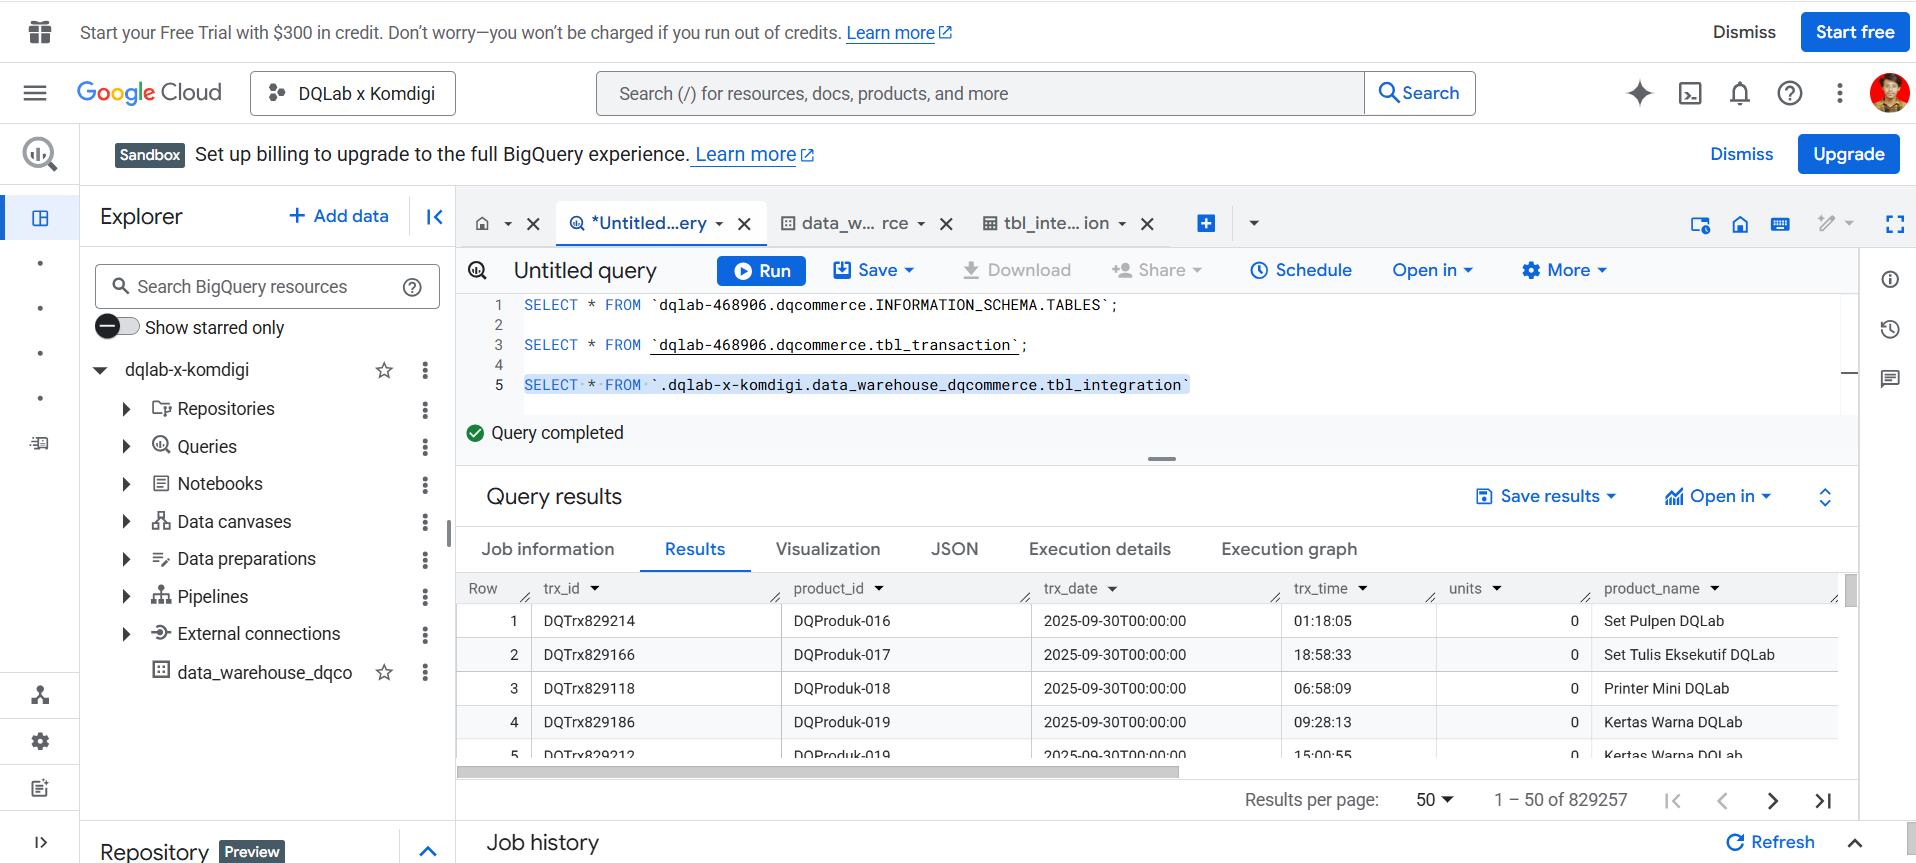

---

# **Analisis Data**

### Overview Total Penjualan Periode Data Tiap Bulan

In [ ]:
data_transaksi['month_year'] = data_transaksi['trx_date'].dt.strftime('%Y-%m')
data_transaksi.head()

,trx_id,product_id,trx_date,trx_time,units,month_year
0,DQTrx829214,DQProduk-016,2025-09-30,01:18:05,<NA>,2025-09
1,DQTrx829166,DQProduk-017,2025-09-30,18:58:33,<NA>,2025-09
2,DQTrx829118,DQProduk-018,2025-09-30,06:58:09,<NA>,2025-09
3,DQTrx829186,DQProduk-019,2025-09-30,09:28:13,<NA>,2025-09
4,DQTrx829212,DQProduk-019,2025-09-30,15:00:55,<NA>,2025-09


In [ ]:
penjualan_bulanan = data_transaksi.groupby(['month_year'], as_index = False).agg(total = ('units', 'sum'))
penjualan_bulanan.head()

,month_year,total
0,2024-01,38009
1,2024-02,36935
2,2024-03,39981
3,2024-04,47102
4,2024-05,46910


In [ ]:
import plotly.express as px

# Membuat line chart
fig = px.line(
    penjualan_bulanan,
    x="month_year",
    y="total",
    title="<b>Grafik Total Penjualan Bulanan DQ-Commerce</b>",
    color_discrete_sequence = ['#39074E'],
    markers=False)

"""
fig.add_vrect(
    x0="2025-03", x1="2025-09",
    fillcolor="#E73c35",
    opacity=0.5,
    layer="below",
    line_width=0,
    #annotation_text="Tahun 2025",
    #annotation_position="top "
)
"""

fig.update_layout(
    height = 450,
    width = 1100,
    plot_bgcolor = 'rgba(0, 0, 0, 0)',
    yaxis = dict(
        showline = True,
        linewidth = 1,
        color = '#544018',
        linecolor = '#544018',
        showgrid=False,
    ),
    xaxis = dict(
        title = '',
        showline = True,
        linewidth = 1,
        color = '#544018',
        linecolor = '#544018',
        showgrid=False,
    ),
)

fig.show()

In [ ]:
penjualan_per_produk = data_transaksi.groupby(['month_year', 'product_id'], as_index = False).agg(total = ('units', 'sum'))
penjualan_per_produk.head()

,month_year,product_id,total
0,2024-01,DQProduk-001,3441
1,2024-01,DQProduk-002,1513
2,2024-01,DQProduk-003,76
3,2024-01,DQProduk-004,166
4,2024-01,DQProduk-005,276


In [ ]:
import plotly.express as px

# Membuat line chart
fig = px.line(
    penjualan_per_produk, #[penjualan['month_year'] >= '2025-01'],
    x="month_year",
    y="total",
    color="product_id",
    title="<b>Grafik Total Penjualan Bulanan DQ-Commerce Per Produk</b>",
    markers=True
)

fig.update_layout(
    height = 550,
    width = 1200,
    plot_bgcolor = 'rgba(0, 0, 0, 0)',
    yaxis = dict(
        showline = True,
        linewidth = 1,
        color = '#544018',
        linecolor = '#544018',
        showgrid=False,
    ),
    xaxis = dict(
        title = '',
        showline = True,
        linewidth = 1,
        color = '#544018',
        linecolor = '#544018',
        showgrid=False,
    ),
)

fig.show()

In [ ]:
import plotly.graph_objects as go

highlight_product = ['DQProduk-003', 'DQProduk-019', 'DQProduk-025', 'DQProduk-018', 'DQProduk-031']

fig = go.Figure()

# Loop setiap produk
for product in penjualan_per_produk['product_id'].unique():
    df_product = penjualan_per_produk[penjualan_per_produk['product_id'] == product]

    # Tentukan properti styling
    if product in highlight_product:
        line_color = 'purple'
        line_width = 3
    else:
        line_color = 'lightgray'
        line_width = 1.2

    # Tambahkan trace
    fig.add_trace(go.Scatter(
        x=df_product['month_year'],
        y=df_product['total'],
        mode='lines+markers',
        name=product,
        line=dict(
            width=line_width,
            color=line_color
        )
    ))

# Layout styling
fig.update_layout(
    title="<b>Grafik Total Penjualan Bulanan DQ-Commerce Per Produk</b>",
    height=550,
    width=1200,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    xaxis=dict(
        showline=True,
        linewidth=1,
        color='#544018',
        linecolor='#544018',
        title='',
        showgrid=False,
    ),
    yaxis=dict(
        showline=True,
        linewidth=1,
        color='#544018',
        linecolor='#544018',
        showgrid=False,
    )
)

fig.show()